In [26]:
import pandas as pd
import numpy as np  

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [27]:
data = pd.read_csv('data.csv')
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data = data.loc[:, (data != 0).any(axis=0)]

# Scale the Data

In [29]:
data = data/data.max()+1

# Random Centroids Initialization

In [30]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)


In [31]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis = 1)))
    return distances.idxmin(axis=1)

In [32]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x.mean()))).T

In [33]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x = data_2d[:,0], y = data_2d[:,1], c = labels)
    plt.scatter(x = centroids_2d[:,0], y = centroids_2d[:,1])
    plt.show()

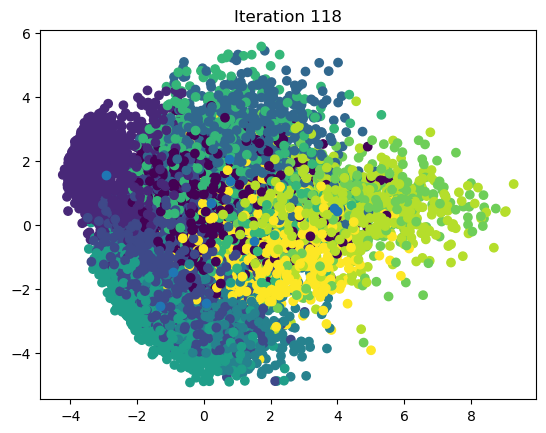

In [34]:
max_iterations = 1000
K = 10

centroids = random_centroids(data, K)
old_centroids = pd.DataFrame()
iteration = 1


while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, K)
    plot_clusters(data, labels, centroids, iteration)
    iteration +=1

In [35]:
labels

0       3
1       1
2       8
3       4
4       1
       ..
9994    6
9995    3
9996    2
9997    2
9998    9
Length: 9999, dtype: int64

In [36]:
def calculate_sse(data, centroids, labels):
    sse = 0

    for i in range(len(data)):
        
        cluster_center = centroids[labels[i]]
        sse += np.sum((data.iloc[i] - cluster_center) ** 2)
    return sse

In [37]:
Euclidean_SSE = calculate_sse(data, centroids, labels)
Euclidean_SSE = Euclidean_SSE.round(2)

Euclidean_SSE


391158.16

In [38]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: 1 - (data.dot(x) / (np.linalg.norm(data, axis=1) * np.linalg.norm(x))))
    return distances.idxmin(axis=1)

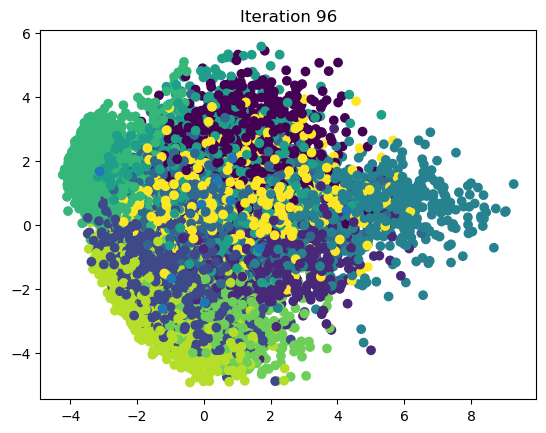

In [39]:
max_iterations = 1000
K = 10

centroids = random_centroids(data, K)
old_centroids = pd.DataFrame()
iteration = 1


while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, K)
    plot_clusters(data, labels, centroids, iteration)
    iteration +=1

In [40]:
labels

0       0
1       6
2       4
3       7
4       6
       ..
9994    5
9995    0
9996    2
9997    9
9998    1
Length: 9999, dtype: int64

In [41]:
Cosine_SSE = calculate_sse(data, centroids, labels)
Cosine_SSE = Cosine_SSE.round(2)

Cosine_SSE

392079.83

In [42]:
def generalized_jaccard_distance(x, y):
    intersection = np.sum(np.minimum(x, y))
    union = np.sum(np.maximum(x, y))
    
    if union == 0:
        return 0  # обработка деления на ноль
    else:
        return 1 - (intersection / union)


def get_labels(data, centroids):
    distances = centroids.apply(lambda centroid: data.apply(lambda point: generalized_jaccard_distance(centroid, point), axis=1))
    return distances.idxmin(axis=1)

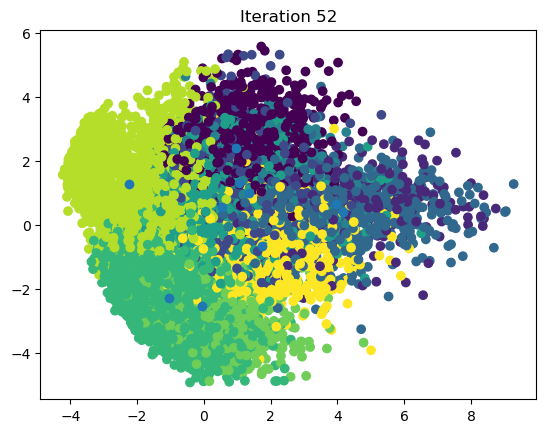

In [43]:
max_iterations = 1000
K = 10

centroids = random_centroids(data, K)
old_centroids = pd.DataFrame()
iteration = 1


while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, K)
    plot_clusters(data, labels, centroids, iteration)
    iteration +=1

In [46]:
Jaccard_SSE = calculate_sse(data, centroids, labels)
Jaccard_SSE = Jaccard_SSE.round(2)

Jaccard_SSE


396446.31

In [47]:
labels

0       8
1       8
2       3
3       7
4       8
       ..
9994    2
9995    0
9996    6
9997    8
9998    9
Length: 9999, dtype: int64